In [14]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [15]:
# Load The Datset And Print it
df = pd.read_csv("iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
# Check Null Values in the Datset
missing_values = df.isnull().sum()
if missing_values.any():
    print("There are some missing vlaues in the dataset")
    print(missing_values)
else:
    print("There are no missing values in the dataset")
    

There are no missing values in the dataset


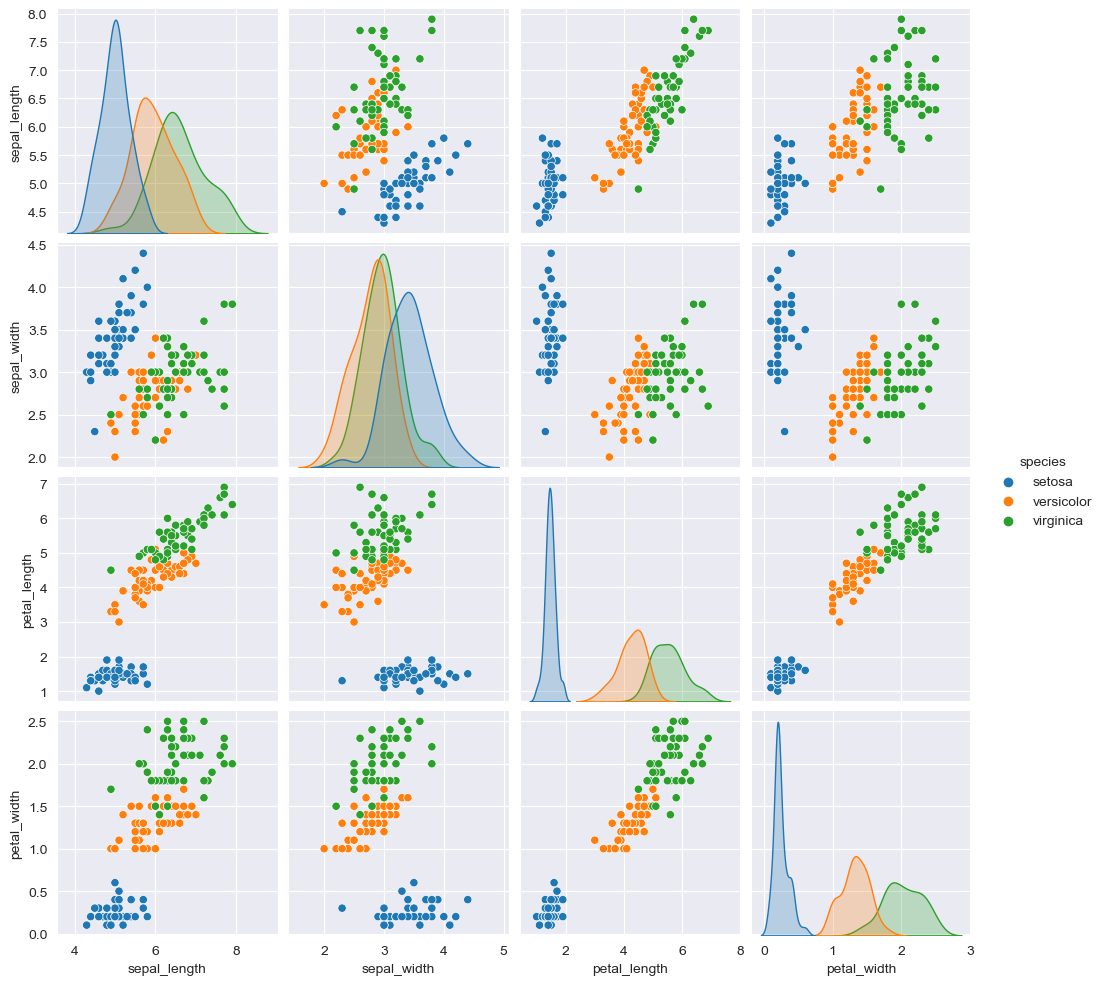

In [19]:
sns.pairplot(df, hue = "species")
plt.show()

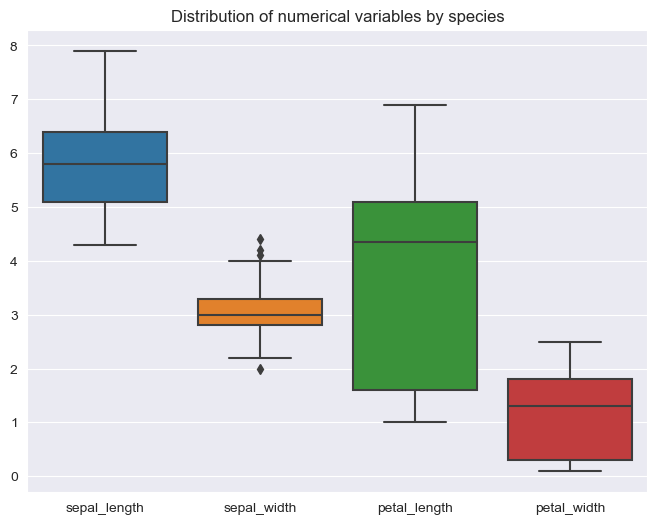

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(data = df.drop('species', axis = 1))
plt.title("Distribution of numerical variables by species")
plt.show()


In [23]:
X = df.drop('species', axis = 1)
y = df['species']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)

In [27]:
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [28]:
classifier.score(X_test, y_test)

1.0

In [29]:
import pickle

In [30]:
pickle.dump(classifier,open('model.pkl','wb'))